In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from IPython.display import display
from neqsim.thermo import TPflash, fluid
from neqsim.thermo.thermoTools import jNeqSim
from sklearn.model_selection import StratifiedKFold
from typing import Dict

In [2]:
df = pd.read_csv(
    "experimental_data\\thermodinamically_processed_data.csv",
    index_col=False,
)
composition_data = df.loc[:, df.columns.str.contains("z")]

print(f"Dataset: {df.shape[0]} samples")
df.head()

Dataset: 463 samples


,Field,Id,Date,FluidKind,LastFluidMolecularWeight,LastFluidSpecificGravity,zN2,zCO2,zC1,zC2,...,zC12,zC13,zC14,zC15,zC16,zC17,zC18,zC19,zC20,LastFluidComponent
0,Albacora,200588838534569195818022639230611277018,28/11/2013,OLEO,513.0,0.9375,0.28,2.18,50.34,8.80,...,1.39,1.42,1.19,1.12,0.84,0.75,0.74,0.71,7.54,C20
1,Albacora,235655066780487493060135334531738441741,28/11/2013,OLEO,513.0,0.9375,0.28,2.18,50.34,8.80,...,1.39,1.42,1.19,1.12,0.84,0.75,0.74,0.71,7.54,C20
2,Albacora,2850024621782551530469011068396203900,11/12/2014,OLEO,447.0,0.9332,0.36,3.23,45.32,7.16,...,1.35,1.40,1.13,1.07,0.83,0.68,0.74,0.67,10.99,C20
3,Albacora,66820533634321543631617927163864636933,11/12/2014,OLEO,447.0,0.9332,0.36,3.23,45.32,7.16,...,1.35,1.40,1.13,1.07,0.83,0.68,0.74,0.67,10.99,C20
4,Albacora,321567418088616429351396831258924766066,01/08/2007,OLEO,428.0,0.9508,0.01,0.17,42.67,5.08,...,1.44,1.48,1.30,1.30,1.00,0.86,0.84,0.75,24.57,C20


C:\Users\E5P8\AppData\Local\Temp\ipykernel_27172\1716125080.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  samples = pd.concat([samples, pd.DataFrame.from_records(new_samples)])


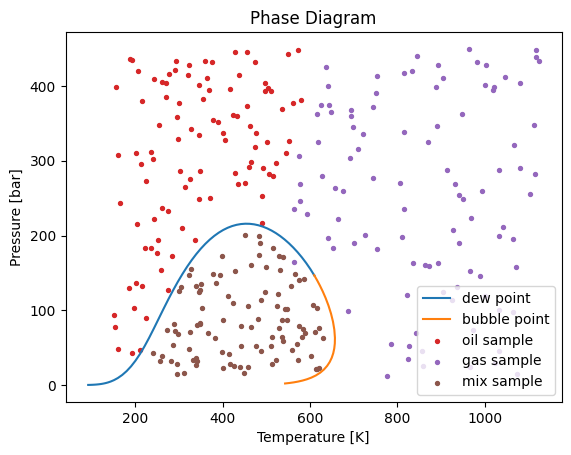

,Field,Id,Date,FluidKind,LastFluidMolecularWeight,LastFluidSpecificGravity,zN2,zCO2,zC1,zC2,...,zC15,zC16,zC17,zC18,zC19,zC20,LastFluidComponent,P,T,class
0,Albacora,200588838534569195818022639230611277018,28/11/2013,OLEO,513.0,0.9375,0.28,2.18,50.34,8.80,...,1.12,0.84,0.75,0.74,0.71,7.54,C20,351.209498,388.240675,oil
1,Albacora,200588838534569195818022639230611277018,28/11/2013,OLEO,513.0,0.9375,0.28,2.18,50.34,8.80,...,1.12,0.84,0.75,0.74,0.71,7.54,C20,284.032203,428.562534,oil
2,Albacora,200588838534569195818022639230611277018,28/11/2013,OLEO,513.0,0.9375,0.28,2.18,50.34,8.80,...,1.12,0.84,0.75,0.74,0.71,7.54,C20,176.882055,249.505425,oil
3,Albacora,200588838534569195818022639230611277018,28/11/2013,OLEO,513.0,0.9375,0.28,2.18,50.34,8.80,...,1.12,0.84,0.75,0.74,0.71,7.54,C20,327.143102,404.697981,oil
4,Albacora,200588838534569195818022639230611277018,28/11/2013,OLEO,513.0,0.9375,0.28,2.18,50.34,8.80,...,1.12,0.84,0.75,0.74,0.71,7.54,C20,173.210928,283.635527,oil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Tupi,114627483014009650637389686145140738472,19/10/2011,OLEO,489.0,0.8165,0.36,5.31,54.58,7.39,...,0.81,0.62,0.56,0.59,0.52,8.67,C20,46.803014,607.502348,mix
296,Tupi,114627483014009650637389686145140738472,19/10/2011,OLEO,489.0,0.8165,0.36,5.31,54.58,7.39,...,0.81,0.62,0.56,0.59,0.52,8.67,C20,100.494772,270.430537,mix
297,Tupi,114627483014009650637389686145140738472,19/10/2011,OLEO,489.0,0.8165,0.36,5.31,54.58,7.39,...,0.81,0.62,0.56,0.59,0.52,8.67,C20,101.395028,478.903031,mix
298,Tupi,114627483014009650637389686145140738472,19/10/2011,OLEO,489.0,0.8165,0.36,5.31,54.58,7.39,...,0.81,0.62,0.56,0.59,0.52,8.67,C20,79.280478,290.638825,mix


In [7]:
samples_per_class = 100
samples = pd.DataFrame(columns=df.columns.to_list() + ["P", "T", "class"])

components = {
    "zN2": "nitrogen",
    "zCO2": "CO2",
    "zC1": "methane",
    "zC2": "ethane",
    "zC3": "propane",
    "zIC4": "i-butane",
    "zNC4": "n-butane",
    "zIC5": "i-pentane",
    "zNC5": "n-pentane",
    "zC6": "n-hexane",
    "zC7": "n-heptane",
    "zC8": "n-octane",
    "zC9": "n-nonane",
    "zC10": "nC10",
    "zC11": "nC11",
    "zC12": "nC12",
    "zC13": "nC13",
    "zC14": "nC14",
    "zC15": "nC15",
    "zC16": "nC16",
    "zC17": "nC17",
    "zC18": "nC18",
    "zC19": "nC19",
    "zC20": "nC20",
}


def set_components(composition: Dict[str, float]):
    fluid1 = fluid("pr")
    for component, fraction in composition.items():
        fluid1.addComponent(components[component], fraction)
    fluid1.setMixingRule("classic")  # classic will use binary kij
    return fluid1


for i in np.arange(df.shape[0]):
    fluid1 = set_components(composition_data.loc[i, :].to_dict())
    thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid1)
    thermoOps.calcPTphaseEnvelope(True, 0.1)
    dewT = np.array(thermoOps.getOperation().get("dewT"))
    dewP = np.array(thermoOps.getOperation().get("dewP"))
    bubT = np.array(thermoOps.getOperation().get("bubT"))
    bubP = np.array(thermoOps.getOperation().get("bubP"))

    # P_min = 10 bara   T_min = 150 K
    # P_max = 450 bara  T_max = 1125 K
    gas_sample, oil_sample, mix_sample = [], [], []

    while (
        len(gas_sample) < samples_per_class
        or len(oil_sample) < samples_per_class
        or len(mix_sample) < samples_per_class
    ):
        P_sample = np.random.uniform(10, 450)
        T_sample = np.random.uniform(150, 1125)

        fluid1.setTemperature(T_sample, "K")
        fluid1.setPressure(P_sample, "bara")
        TPflash(fluid1)

        phases = [p for p in fluid1.getPhases() if p]
        phases_names = [phase.getPhaseTypeName() for phase in phases]
        if fluid1.getNumberOfPhases() == 1:
            if phases_names[0] == "oil":
                if len(oil_sample) < samples_per_class:
                    oil_sample.append([T_sample, P_sample])
            if phases_names[0] == "gas":
                if len(gas_sample) < samples_per_class:
                    gas_sample.append([T_sample, P_sample])
        elif fluid1.getNumberOfPhases() == 2:
            if len(mix_sample) < samples_per_class:
                mix_sample.append([T_sample, P_sample])

    new_samples = []

    for s in oil_sample:
        sample_dict = df.iloc[i, :].to_dict()
        sample_dict["T"] = s[0]
        sample_dict["P"] = s[1]
        sample_dict["class"] = "oil"
        new_samples.append(sample_dict)

    for s in gas_sample:
        sample_dict = df.iloc[i, :].to_dict()
        sample_dict["T"] = s[0]
        sample_dict["P"] = s[1]
        sample_dict["class"] = "gas"
        new_samples.append(sample_dict)
    
    for s in mix_sample:
        sample_dict = df.iloc[i, :].to_dict()
        sample_dict["T"] = s[0]
        sample_dict["P"] = s[1]
        sample_dict["class"] = "mix"
        new_samples.append(sample_dict)

    samples = pd.concat([samples, pd.DataFrame.from_records(new_samples)])

    oil_sample = np.array(oil_sample)
    gas_sample = np.array(gas_sample)
    mix_sample = np.array(mix_sample)

    if i == 0:
        plt.plot(dewT, dewP, label="dew point", color="C0")
        plt.plot(bubT, bubP, label="bubble point", color="C1")
        plt.scatter(oil_sample[:, 0], oil_sample[:, 1], label="oil sample", c="C3", s=8)
        plt.scatter(gas_sample[:, 0], gas_sample[:, 1], label="gas sample", c="C4", s=8)
        plt.scatter(mix_sample[:, 0], mix_sample[:, 1], label="mix sample", c="C5", s=8)
        plt.title("Phase Diagram")
        plt.xlabel("Temperature [K]")
        plt.ylabel("Pressure [bar]")
        plt.legend()
        plt.show()

samples

In [8]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)
folder_path = f"data\\experimental\\classification\\{samples_per_class:03d}points\\"

if not os.path.isdir(folder_path):
    os.mkdir(folder_path)

samples = samples.sample(frac=1, ignore_index=True)
for i, (train_idx, test_idx) in enumerate(skf.split(samples, samples["class"])):
    train_size = train_idx.shape[0] - test_idx.shape[0]
    train_idx, valid_idx = train_idx[:train_size], train_idx[train_size:]

    print(f">>>> Fold {i+1} >>>>>>>>>>>>>>>>>>>>>>")
    print("train: ", train_idx.shape[0], ", valid: ", valid_idx.shape[0], ", test: ", test_idx.shape[0], sep="")
    train = samples.iloc[train_idx, :]
    valid = samples.iloc[valid_idx, :]
    test = samples.iloc[test_idx, :]
    print("train per class:")
    print(f'    {train[train["class"]=="oil"].shape[0]} (oil),', end=" ")
    print(f'{train[train["class"]=="gas"].shape[0]} (gas),', end=" ")
    print(f'{train[train["class"]=="mix"].shape[0]} (mix)')
    print("valid per class:")
    print(f'    {valid[valid["class"]=="oil"].shape[0]} (oil),', end=" ")
    print(f'{valid[valid["class"]=="gas"].shape[0]} (gas),', end=" ")
    print(f'{valid[valid["class"]=="mix"].shape[0]} (mix)')
    print("test per class:")
    print(f'    {test[test["class"]=="oil"].shape[0]} (oil),', end=" ")
    print(f'{test[test["class"]=="gas"].shape[0]} (gas),', end=" ")
    print(f'{test[test["class"]=="mix"].shape[0]} (mix)')

    print()
    samples.iloc[train_idx, :].to_csv(f"{folder_path}train_data_fold={i+1:02d}.csv", index=False)
    samples.iloc[valid_idx, :].to_csv(f"{folder_path}valid_data_fold={i+1:02d}.csv", index=False)
    samples.iloc[test_idx, :].to_csv(f"{folder_path}test_data_fold={i+1:02d}.csv", index=False)

>>>> Fold 1 >>>>>>>>>>>>>>>>>>>>>>
train: 111120, valid: 13890, test: 13890
train per class:
    37048 (oil), 37035 (gas), 37037 (mix)
valid per class:
    4622 (oil), 4635 (gas), 4633 (mix)
test per class:
    4630 (oil), 4630 (gas), 4630 (mix)

>>>> Fold 2 >>>>>>>>>>>>>>>>>>>>>>
train: 111120, valid: 13890, test: 13890
train per class:
    37065 (oil), 37001 (gas), 37054 (mix)
valid per class:
    4605 (oil), 4669 (gas), 4616 (mix)
test per class:
    4630 (oil), 4630 (gas), 4630 (mix)

>>>> Fold 3 >>>>>>>>>>>>>>>>>>>>>>
train: 111120, valid: 13890, test: 13890
train per class:
    37021 (oil), 37035 (gas), 37064 (mix)
valid per class:
    4649 (oil), 4635 (gas), 4606 (mix)
test per class:
    4630 (oil), 4630 (gas), 4630 (mix)

>>>> Fold 4 >>>>>>>>>>>>>>>>>>>>>>
train: 111120, valid: 13890, test: 13890
train per class:
    37039 (oil), 37019 (gas), 37062 (mix)
valid per class:
    4631 (oil), 4651 (gas), 4608 (mix)
test per class:
    4630 (oil), 4630 (gas), 4630 (mix)

>>>> Fold 5 